In [55]:
# IMPORT PACKAGES
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow import keras

In [56]:
# DATA LOADING
csv_path = 'dataset/cases_malaysia.csv'
df = pd.read_csv(csv_path, index_col='date',parse_dates=['date'])
MODEL_PATH = os.path.join(os.getcwd(),'models','model.pkl')

print(df.head())
print(df.info())

            cases_new  cases_import  cases_recovered  cases_active  \
date                                                                 
2020-01-25          4             4                0             4   
2020-01-26          0             0                0             4   
2020-01-27          0             0                0             4   
2020-01-28          0             0                0             4   
2020-01-29          3             3                0             7   

            cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
date                                                                          
2020-01-25              0            4           0           0            0   
2020-01-26              0            0           0           0            0   
2020-01-27              0            0           0           0            0   
2020-01-28              0            0           0           0            0   
2020-01-29              0          

In [57]:
# date_time = pd.to_datetime(format="%Y-%m-%d")
# date_time.head()

In [58]:
# Check for missing values and duplicates
print(df.isna().sum()) # 570 values for each cluster 
print(df.duplicated().sum()) # 10 duplicated values

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             570
cluster_religious          570
cluster_community          570
cluster_highRisk           570
cluster_education          570
cluster_detentionCentre    570
cluster_workplace          570
dtype: int64
10


In [59]:
df['cases_new'] = pd.to_numeric(df['cases_new'],errors='coerce') 

In [60]:
df['cases_new'] = df['cases_new'].fillna(df['cases_new'].fillna(0))
df['cluster_import'] = df['cases_new'].fillna(df['cluster_import'].fillna(0))
df['cluster_religious'] = df['cases_new'].fillna(df['cluster_religious'].fillna(0))
df['cluster_community'] = df['cases_new'].fillna(df['cluster_community'].fillna(0))
df['cluster_highRisk'] = df['cases_new'].fillna(df['cluster_highRisk'].fillna(0))
df['cluster_education'] = df['cases_new'].fillna(df['cluster_education'].fillna(0))
df['cluster_detentionCentre'] = df['cases_new'].fillna(df['cluster_detentionCentre'].fillna(0))
df['cluster_workplace'] = df['cases_new'].fillna(df['cluster_workplace'].fillna(0))

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   cases_new                1744 non-null   int64
 1   cases_import             1744 non-null   int64
 2   cases_recovered          1744 non-null   int64
 3   cases_active             1744 non-null   int64
 4   cases_cluster            1744 non-null   int64
 5   cases_unvax              1744 non-null   int64
 6   cases_pvax               1744 non-null   int64
 7   cases_fvax               1744 non-null   int64
 8   cases_boost              1744 non-null   int64
 9   cases_child              1744 non-null   int64
 10  cases_adolescent         1744 non-null   int64
 11  cases_adult              1744 non-null   int64
 12  cases_elderly            1744 non-null   int64
 13  cases_0_4                1744 non-null   int64
 14  cases_5_11               1744 non-null

In [62]:
# Recheck for missing values again
print(df.isna().sum())

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64


In [63]:
# LOAD DATA 
df.describe().transpose()
# Since there's no extreme gaps and outliers, data is good

,count,mean,std,min,25%,50%,75%,max
cases_new,1744.0,3050.001720,5588.837322,0.0,128.75,803.0,3200.00,33406.0
cases_import,1744.0,22.502867,76.601202,0.0,1.00,3.0,8.00,719.0
cases_recovered,1744.0,3023.658257,5540.421141,0.0,117.75,796.5,3227.50,33872.0
cases_active,1744.0,37942.768922,61800.088695,1.0,8460.25,13839.0,36568.00,323791.0
cases_cluster,1744.0,306.498280,619.205875,0.0,0.00,7.0,269.25,3394.0
cases_unvax,1744.0,1172.648509,2339.900620,0.0,24.00,125.0,1162.75,12681.0
cases_pvax,1744.0,250.495413,997.565343,0.0,0.00,2.0,19.00,7315.0
cases_fvax,1744.0,813.951261,1935.319149,0.0,1.00,44.0,439.00,13058.0
cases_boost,1744.0,812.906537,2248.538349,0.0,0.00,83.0,496.25,18176.0
cases_child,1744.0,371.459289,772.875075,0.0,8.75,48.0,245.25,4389.0


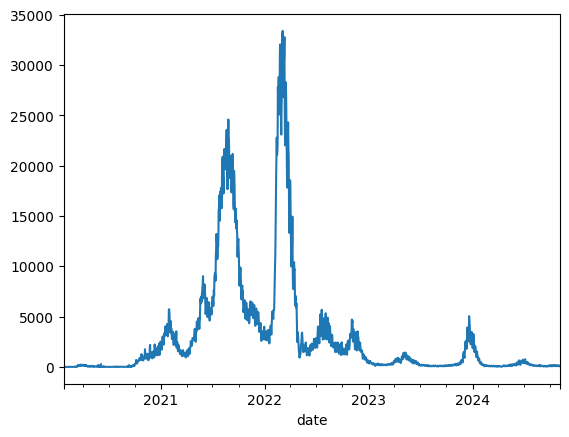

In [64]:
df['cases_new'].plot()
plt.show()

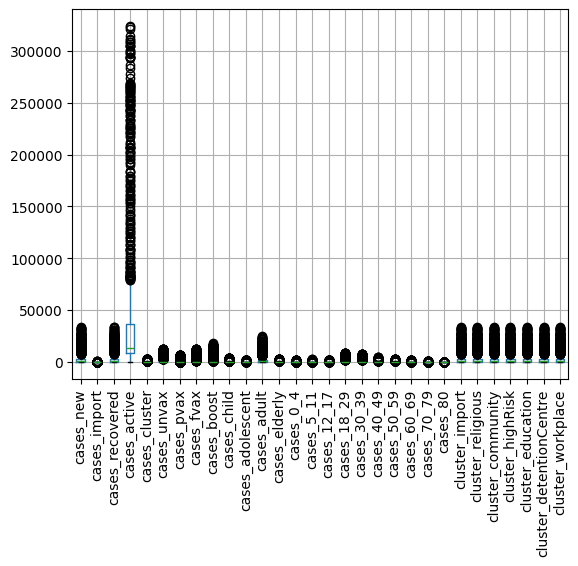

In [65]:
df.boxplot(rot=90)
plt.show()

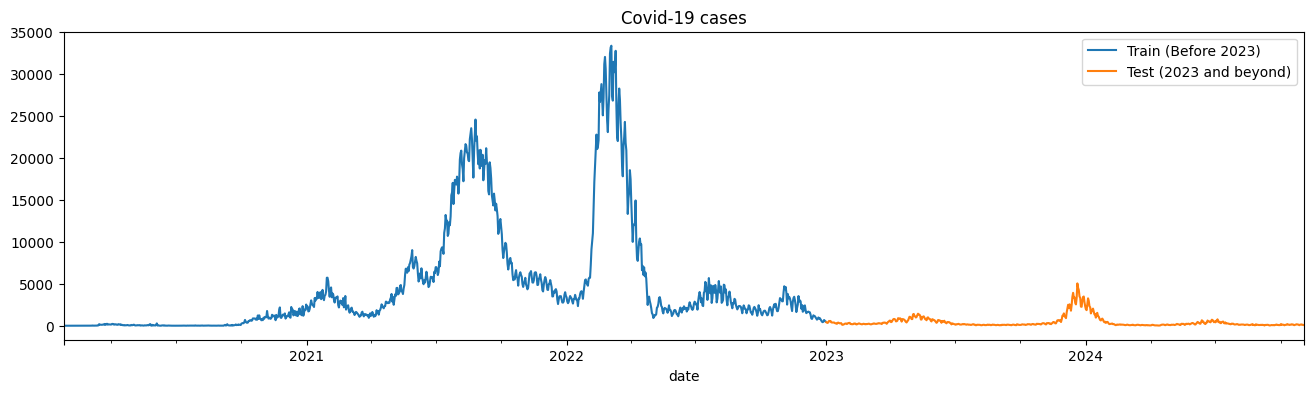

In [66]:
tstart = 2020
tend = 2022

def train_test_plot(df,tstart,tend):
    df.loc[f'{tstart}':f'{tend}','cases_new'].plot(figsize=(16,4),label=f"Train (Before {tend+1})")
    df.loc[f'{tend+1}':, 'cases_new'].plot(figsize=(16,4),label=f"Test ({tend+1} and beyond)")
    plt.legend()
    plt.title('Covid-19 cases')
    plt.show()

train_test_plot(df,tstart,tend)

In [67]:
# DATA PREPROCESSING
def train_test_split(df,tstart,tend):
    train = df.loc[f"{tstart}":f"{tend}","cases_new"].values
    test = df.loc[f"{tend+1}":,"cases_new"].values
    return train,test

training_set,test_set = train_test_split(df,tstart,tend)

In [68]:
mms = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = mms.fit_transform(training_set)
print(training_set_scaled[:5])

[[1.19738969e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.98042268e-05]]


In [69]:
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

n_steps = 30
features = 1

X_train,y_train = split_sequence(training_set_scaled,n_steps)

In [70]:
# Reshape X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)
print(X_train.shape)

(1042, 30, 1)


In [71]:
# LSTM Model 

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.LSTM(units=32,activation='tanh',input_shape=(n_steps,features),return_sequences=True))
model_lstm.add(keras.layers.Dropout(0.01))
model_lstm.add(keras.layers.LSTM(units=64))
model_lstm.add(keras.layers.Dense(units=1))

d:\Anaconda\Anaconda\envs\tensorflow_cpu\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

None


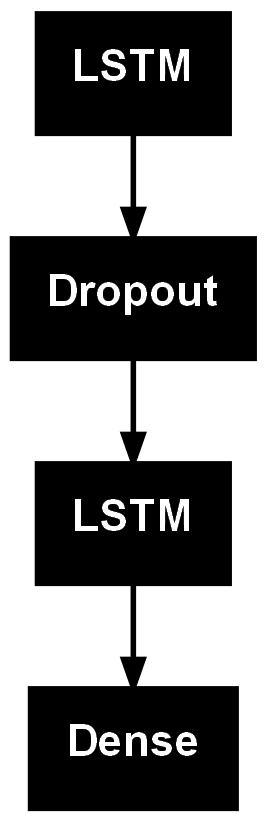

In [72]:
# Compiling the model
model_lstm.compile(optimizer='adam',loss='mse',metrics=['mae'])
print(model_lstm.summary())
keras.utils.plot_model(model_lstm)

In [73]:
es = keras.callbacks.EarlyStopping (patience=2, verbose=1)
logpath = 'tensorboard/covid19_new/' + datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
tb= keras.callbacks.TensorBoard(logpath)
history = model_lstm.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=[tb,es])

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0193 - mae: 0.0858
Epoch 2/50
 6/33 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030 - mae: 0.0296

d:\Anaconda\Anaconda\envs\tensorflow_cpu\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0036 - mae: 0.0331
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - mae: 0.0270
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0018 - mae: 0.0275
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - mae: 0.0225
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - mae: 0.0240
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0018 - mae: 0.0241
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0015 - mae: 0.0224
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014 - mae: 0.0211
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0013 - mae: 0.0206
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016 - mae: 0.0222
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014 - mae: 0.0204
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - mae: 0.0182
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/

In [74]:
dataset_total = df.loc[:,'cases_new']
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)

# scaling
inputs = mms.transform(inputs)

# Split into samples
X_test,y_test = split_sequence(inputs,n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)
# predictions
predicted_covid_cases = model_lstm.predict(X_test)
# inverse transform the values - undo the normalization of stock prices (undo any sklearn's transform)
predicted_covid_cases = mms.inverse_transform(predicted_covid_cases )

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [75]:
def plot_predictions(test,predicted):
    plt.plot(test,color='blue',label='Real')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title('Covid Cases Prediction')
    plt.xlabel('Day')
    plt.ylabel('New Cases')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print('The root mean square error is {:.2f}.'.format(rmse))
    

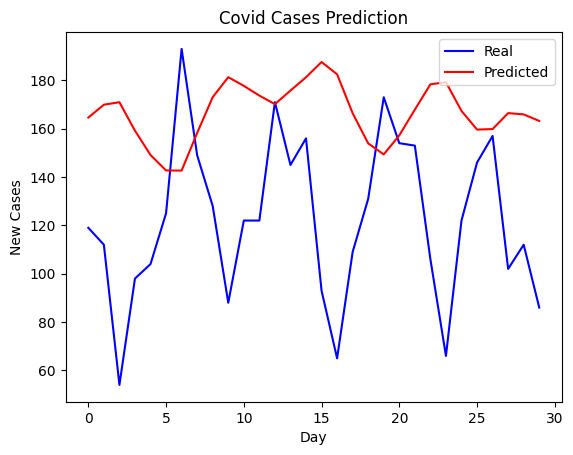

In [76]:
plot_predictions(test_set[-30:],predicted_covid_cases[-30:])

In [77]:
# Model Evaluation
evaluation = model_lstm.evaluate(X_test,y_test)
print(evaluation)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4159e-05 - mae: 0.0032
[4.218650428811088e-05, 0.0032774629071354866]


In [ ]:
# MAE 
mae = evaluation[1]
print("Mean Absolute Error (MAE):",mae)

Mean Absolute Error (MAE): 0.0032774629071354866


In [ ]:
# Mean Absolute Percentage Error (MAPE)
mape = (mae/sum(abs(y_test)))*100
print(mape)

[0.0374281]


In [ ]:
# RMSE 
print(return_rmse(test_set,predicted_covid_cases))

The root mean square error is 216.98.
None


In [81]:
# Save Model
import pickle
with open (MODEL_PATH, 'wb') as file:
    pickle.dump(model_lstm,file)  